In [2]:
from math import pi

import functorch
from matplotlib.colors import CenteredNorm
import matplotlib.pyplot as plt
import torch

from caustic.cosmology import FlatLambdaCDM
from caustic.lenses import KappaGrid
from caustic.sources import Sersic
from caustic.utils import get_meshgrid

In [86]:
n_pix = 100
fov = 5.0
res = fov / n_pix
thx, thy = get_meshgrid(res, n_pix, n_pix)
z_l = torch.tensor(0.9)
z_s = torch.tensor(2.1)
extent = (-fov / 2, fov / 2, -fov / 2, fov / 2)

cosmo = FlatLambdaCDM("cosmo")
lens = KappaGrid("lens", fov, n_pix, cosmo, z_l, kappa_map_shape=(1, 1, n_pix, n_pix))
src = Sersic("src")
x_src = torch.tensor([0.14, 0.04, 1.0, 0.0, 4.0, 100.0, 1.0])

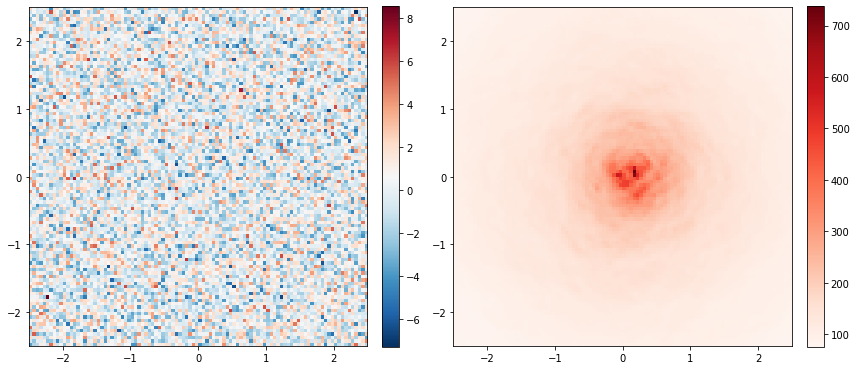

In [96]:
plt.figure(figsize=(12, 6))

kappa_map = torch.randn(1, 1, n_pix, n_pix) * 2

plt.subplot(1, 2, 1)
plt.imshow(kappa_map[0, 0], origin="lower", cmap="RdBu_r", extent=extent)
plt.colorbar(fraction=0.046, pad=0.04)

plt.subplot(1, 2, 2)
bx, by = lens.raytrace(thx, thy, z_l, lens.x_to_dict([kappa_map]))
img = src.brightness(bx, by, src.x_to_dict(x_src))[0, 0]
plt.imshow(img, origin="lower", cmap="Reds", extent=extent)
plt.colorbar(fraction=0.046, pad=0.04)

plt.tight_layout()